# Speech Emotion Recognition – Preprocessing
## Notebook 6: Feature Engineering (Statistical Summaries) – with One Hot Encoding

**Registraton Number:** ITxxxxxxxx  
**Task:** Create new statistical features from existing audio features and prepare final labels using One Hot Encoding.  
**Objective:** Enrich dataset with engineered features and ensure labels are in binary vector form.

### Step 1: Importing Libraries and Data Arrays
First, we need to import the necessary Libraries and Data Arrays of Extracted Features.

In [2]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import OneHotEncoder

# Load dataset
X = np.load("../results/features_and_labels/X_features.npy", allow_pickle=False)
y = np.load("../results/features_and_labels/y_labels.npy", allow_pickle=True)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (2870, 116)
Labels shape: (2870,)


### Step 2: Convert Features into DataFrame

In [4]:
df = pd.DataFrame(X, columns=[f"f{i}" for i in range(X.shape[1])])
df["emotion"] = y
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f107,f108,f109,f110,f111,f112,f113,f114,f115,emotion
0,-469.677063,33.594616,4.975258,8.371067,1.992480,-4.194683,-2.305305,-3.754504,-2.330569,4.608140,...,0.445539,0.191169,0.231488,0.221131,0.340141,0.170471,0.279709,0.381629,0.199950,neutral
1,-459.840088,33.337284,3.588513,10.999732,0.765450,-3.593445,-2.849192,-5.310829,-1.954750,4.414882,...,0.454025,0.193513,0.230735,0.219533,0.324711,0.168356,0.282292,0.410520,0.188443,neutral
2,-460.854553,35.502811,4.278590,8.724514,-0.171948,-2.784281,-3.759825,-4.420269,-3.023970,3.874425,...,0.460651,0.186819,0.225535,0.214604,0.338257,0.162786,0.264915,0.380400,0.208246,neutral
3,-455.989563,35.595882,5.115926,9.091783,0.802329,-1.342748,-3.980319,-4.840831,-1.725044,5.335970,...,0.476619,0.193392,0.240152,0.209993,0.328946,0.155799,0.264079,0.399235,0.209314,neutral
4,-484.466675,36.726303,6.566588,8.952496,1.008656,-3.470678,-4.511901,-3.212588,-4.341210,3.822065,...,0.440573,0.187168,0.231194,0.202355,0.320247,0.151997,0.260596,0.402678,0.173798,calm


### Step 3: Add Statistical Summary Features
- **Mean** of features per sample  
- **Standard Deviation**  
- **Skewness**  
- **Kurtosis**

In [5]:
df["feat_mean"] = df.drop(columns=["emotion"]).mean(axis=1)
df["feat_std"] = df.drop(columns=["emotion"]).std(axis=1)
df["feat_skew"] = df.drop(columns=["emotion"]).skew(axis=1)
df["feat_kurt"] = df.drop(columns=["emotion"]).kurt(axis=1)

df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f111,f112,f113,f114,f115,emotion,feat_mean,feat_std,feat_skew,feat_kurt
0,-469.677063,33.594616,4.975258,8.371067,1.992480,-4.194683,-2.305305,-3.754504,-2.330569,4.608140,...,0.340141,0.170471,0.279709,0.381629,0.199950,neutral,-3.913586,43.567997,-10.608886,115.339104
1,-459.840088,33.337284,3.588513,10.999732,0.765450,-3.593445,-2.849192,-5.310829,-1.954750,4.414882,...,0.324711,0.168356,0.282292,0.410520,0.188443,neutral,-3.866359,42.661442,-10.601458,115.230209
2,-460.854553,35.502811,4.278590,8.724514,-0.171948,-2.784281,-3.759825,-4.420269,-3.023970,3.874425,...,0.338257,0.162786,0.264915,0.380400,0.208246,neutral,-3.876394,42.764576,-10.593770,115.130852
3,-455.989563,35.595882,5.115926,9.091783,0.802329,-1.342748,-3.980319,-4.840831,-1.725044,5.335970,...,0.328946,0.155799,0.264079,0.399235,0.209314,neutral,-3.783409,42.322830,-10.590260,115.078339
4,-484.466675,36.726303,6.566588,8.952496,1.008656,-3.470678,-4.511901,-3.212588,-4.341210,3.822065,...,0.320247,0.151997,0.260596,0.402678,0.173798,calm,-4.061332,44.953968,-10.596217,115.174690


### Step 4: Correlation Heatmap of Engineered Features

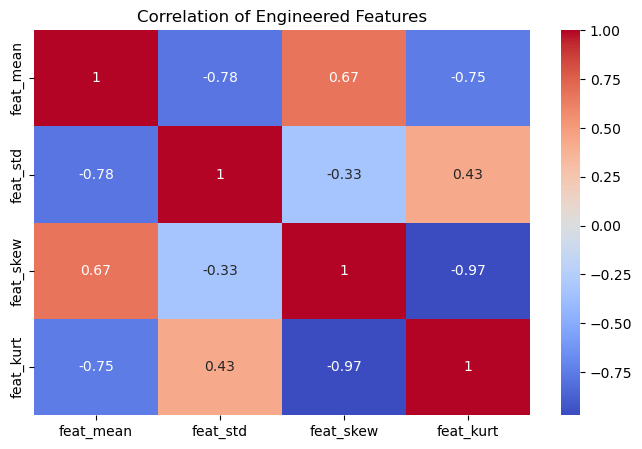

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(df[["feat_mean","feat_std","feat_skew","feat_kurt"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Engineered Features")
plt.show()

### Step 5: Compare Distributions Across Emotions
Example: distribution of **feature mean** for each emotion.

C:\Users\MSI\AppData\Local\Temp\ipykernel_26044\2336411949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="emotion", y="feat_mean", data=df, palette="Set3")


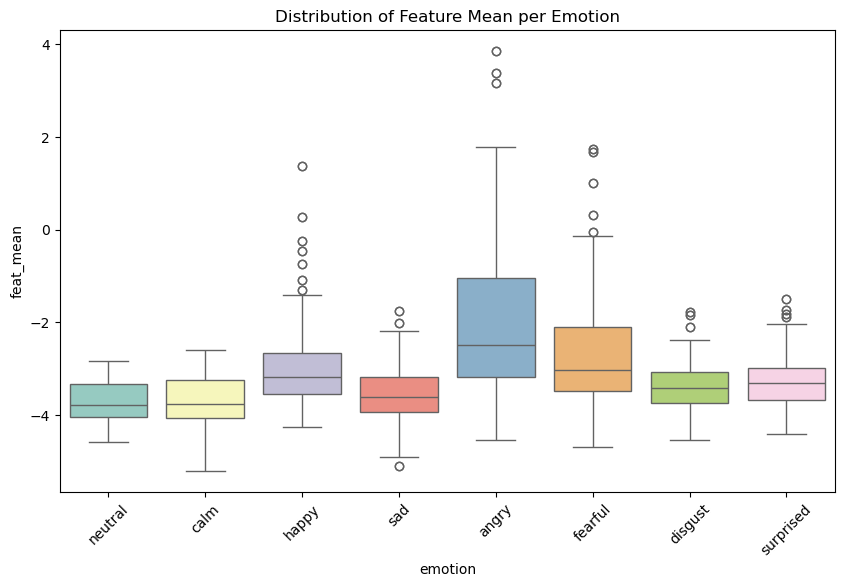

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x="emotion", y="feat_mean", data=df, palette="Set3")
plt.title("Distribution of Feature Mean per Emotion")
plt.xticks(rotation=45)
plt.show()

### Step 6: Prepare Final Dataset (with OHE Labels)

In [8]:
# Extract features (including engineered ones)
X_engineered = df.drop(columns=["emotion"]).values
y_categorical = df["emotion"].values

# One Hot Encode labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y_categorical.reshape(-1,1))

print("Final Features shape:", X_engineered.shape)
print("Final Labels (One Hot) shape:", y_onehot.shape)
print("Classes:", encoder.categories_)

Final Features shape: (2870, 120)
Final Labels (One Hot) shape: (2870, 8)
Classes: [array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)]


# ✅ Conclusion
- Created 4 new statistical features (mean, std, skew, kurtosis).  
- Visualized differences across emotion categories.  
- Applied **One Hot Encoding** to emotion labels.  
- Final dataset (`X_engineered`, `y_onehot`) is richer and ready for ML training.